In [14]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd

In [4]:
df = fetch_openml("mnist_784")
X = df['data']
y = df['target']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
scaler.fit(train_x)

train_x = scaler.transform(train_x)
test_x  = scaler.transform(test_x)

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=300)
pca.fit(train_x)

train_x_pca = pca.transform(train_x)
test_x_pca = pca.transform(test_x)

In [9]:
print(len(train_x[0]))
print(len(train_x_pca[0]))

784
300


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [15]:
def get_time_and_accuracy(train_x, train_y, test_x, test_y):
    lrm = LogisticRegression(max_iter=1000)
    from time import time
    start_time = time()
    
    lrm.fit(train_x, train_y)
    
    end_time = time()
    
    tm = end_time - start_time
    
    y_pred = lrm.predict(test_x)
    
    score = accuracy_score(test_y, y_pred)
    
    return time, score

m_pca_time, m_pca_score = get_time_and_accuracy(train_x_pca, train_y, test_x_pca, test_y)
print(f'Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения: {m_pca_time}, метрика модели: {m_pca_score}')
m_time, m_score = get_time_and_accuracy(train_x, train_y, test_x, test_y)
print(f'Модель, построенная на всех исходных признаках. Время обучения: {m_time}, метрика модели: {m_score}')    

Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения: <built-in function time>, метрика модели: 0.9252857142857143
Модель, построенная на всех исходных признаках. Время обучения: <built-in function time>, метрика модели: 0.9252857142857143


<AxesSubplot:xlabel='0', ylabel='1'>

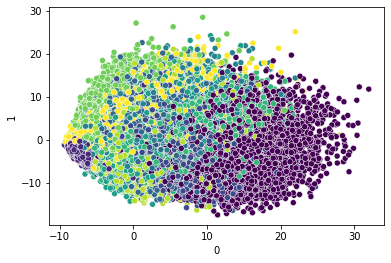

In [17]:
pca = PCA(
    n_components=2,
    random_state=42
)
x_reduced = pca.fit_transform(train_x)

df_pca = pd.DataFrame(x_reduced)
df_pca['c'] = pd.to_numeric(train_y).astype('int64').to_list()

sns.scatterplot(x=df_pca[0], y=df_pca[1], c=df_pca['c'])

In [16]:
from sklearn.manifold import TSNE

<AxesSubplot:xlabel='0', ylabel='1'>

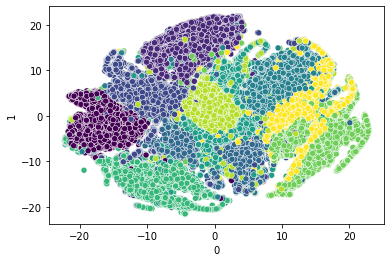

In [19]:
tsne = TSNE(n_components=2, perplexity=50, n_iter=500, random_state=42)

x_reduced = tsne.fit_transform(train_x)
df_tsne = pd.DataFrame(x_reduced)
df_tsne['c'] = pd.to_numeric(train_y).astype('int64').to_list()
sns.scatterplot(x=df_tsne[0], y=df_tsne[1], c=df_tsne['c'])